<a href="https://colab.research.google.com/github/Luisagalvis357/estad-stica-2-/blob/rama2/Parte_practica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PARTE PRACTICA PRIMER PARCIAL

*   Anghely Efftefania Jimenez Baez - 2203039
*   Luisa Fernanda Galvis Moreno - 2203044



# Introduccion
En el ámbito de la educación en Colombia, los resultados de las pruebas Saber 11 juegan un papel crucial en la evaluación del desempeño académico de los estudiantes. Estas pruebas no solo permiten medir el nivel de aprendizaje alcanzado en las distintas áreas del conocimiento, sino que también son una herramienta clave para el diseño e implementación de políticas públicas enfocadas en mejorar continuamente la calidad del sistema educativo en el país.

En este contexto, la presente investigación tiene como objetivo principal llevar a cabo un análisis exhaustivo de diversas variables explicativas a partir de los puntajes obtenidos en las diferentes áreas evaluadas en las pruebas Saber 11, tales como Lectura Crítica, Matemáticas, Ciencias Sociales, Ciencias Naturales e Inglés. Asimismo, se busca estudiar cómo el nivel socioeconómico del evaluado influye en los resultados obtenidos. Para lograrlo, se emplearán métodos estadísticos que permitan identificar patrones, relaciones y posibles desigualdades, ofreciendo una visión integral del impacto del contexto socioeconómico en el rendimiento académico de los estudiantes colombianos. Este análisis pretende aportar información valiosa para la formulación de estrategias que favorezcan la equidad y la calidad en la educación del país.





In [ ]:
import io
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neural_network import MLPRegressor
from scipy.stats import spearmanr, kendalltau

In [ ]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()


Saving SB11_20231.TXT to SB11_20231.TXT


In [ ]:
datos_icfes = pd.read_csv(io.BytesIO(uploaded['SB11_20231.TXT']),
 delimiter='¬')
datos_icfes.head()

<ipython-input-3-9fbde783317a>:1: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  datos_icfes = pd.read_csv(io.BytesIO(uploaded['SB11_20231.TXT']),


,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,PERCENTIL_ESPECIAL_GLOBAL,ESTU_ESTADOINVESTIGACION
0,TI,COLOMBIA,F,04/11/2005,20231,SB11202310019049,ESTUDIANTE,COLOMBIA,CUNDINAMARCA,25,...,87.0,94.0,B+,422,100.0,67.532814,4.0,4,100.0,PUBLICAR
1,TI,COLOMBIA,M,08/04/2007,20231,SB11202310017318,ESTUDIANTE,COLOMBIA,VALLE,76,...,NaN,NaN,NaN,326,NaN,47.223972,2.0,3,100.0,PUBLICAR
2,TI,COLOMBIA,F,26/05/2006,20231,SB11202310030916,ESTUDIANTE,COLOMBIA,VALLE,76,...,NaN,NaN,NaN,186,NaN,67.695519,4.0,3,40.0,PUBLICAR
3,CC,COLOMBIA,F,24/05/2004,20231,SB11202310074169,ESTUDIANTE,COLOMBIA,VALLE,76,...,58.0,43.0,A2,200,12.0,41.863163,2.0,3,58.0,PUBLICAR
4,TI,COLOMBIA,F,04/05/2005,20231,SB11202310044933,ESTUDIANTE,COLOMBIA,VALLE,76,...,69.0,57.0,B1,263,39.0,51.223795,3.0,3,92.0,PUBLICAR


Una vez se tenga la base de datos, se puede mirar el nombre de las columnas de la base de datos.




In [ ]:
datos_icfes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12704 entries, 0 to 12703
Data columns (total 83 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ESTU_TIPODOCUMENTO             12704 non-null  object 
 1   ESTU_NACIONALIDAD              12704 non-null  object 
 2   ESTU_GENERO                    12704 non-null  object 
 3   ESTU_FECHANACIMIENTO           12704 non-null  object 
 4   PERIODO                        12704 non-null  int64  
 5   ESTU_CONSECUTIVO               12704 non-null  object 
 6   ESTU_ESTUDIANTE                12704 non-null  object 
 7   ESTU_PAIS_RESIDE               12704 non-null  object 
 8   ESTU_DEPTO_RESIDE              12704 non-null  object 
 9   ESTU_COD_RESIDE_DEPTO          12704 non-null  int64  
 10  ESTU_MCPIO_RESIDE              12704 non-null  object 
 11  ESTU_COD_RESIDE_MCPIO          12704 non-null  int64  
 12  ESTU_PRESENTACIONSABADO        12702 non-null 

Según la información, se puede observar que hay variables de tipo float64, int64, objecto, por ejemplo, la variable Puntaje Ingles es de tipo float64, la variable puntaje global es de tipo int64, etc.

In [ ]:
datos_icfes.columns

Index(['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO',
       'ESTU_FECHANACIMIENTO', 'PERIODO', 'ESTU_CONSECUTIVO',
       'ESTU_ESTUDIANTE', 'ESTU_PAIS_RESIDE', 'ESTU_DEPTO_RESIDE',
       'ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE', 'ESTU_COD_RESIDE_MCPIO',
       'ESTU_PRESENTACIONSABADO', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR',
       'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE',
       'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS',
       'FAMI_NUMLIBROS', 'FAMI_COMELECHEDERIVADOS',
       'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE',
       'FAMI_SITUACIONECONOMICA', 'ESTU_DEDICACIONLECTURADIARIA',
       'ESTU_DEDICACIONINTERNET', 'ESTU_HORASSEMANATRABAJA',
       'ESTU_TIPOREMUNERACION', 'COLE_CODIGO_

Con base en la información, se observa el nombre de las columnas.

Para el análisis estadístico, hay que eliminar los valores faltantes, esto se hace mediante el siguiente código:

In [ ]:
icfes_sin_nan = datos_icfes[(~datos_icfes['ESTU_INSE_INDIVIDUAL'].isna()) &
 (~datos_icfes['PUNT_LECTURA_CRITICA'].isna()) &
 (~datos_icfes['PUNT_MATEMATICAS'].isna()) &
 (~datos_icfes['PUNT_C_NATURALES'].isna()) &
 (~datos_icfes['PUNT_SOCIALES_CIUDADANAS'].isna()) &
 (~datos_icfes['PUNT_INGLES'].isna())]


Teniendo en cuenta que eliminamos los valores faltantes, entonces podemos hacer la tabla de regresión donde se nota que se borran unas filas con respecto a la primera tabla.

In [ ]:
tabla_regresion = icfes_sin_nan[['ESTU_INSE_INDIVIDUAL', 'PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS','PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES']]
tabla_regresion.head(4)

,ESTU_INSE_INDIVIDUAL,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
0,67.532814,100,83,77,77,87.0
3,41.863163,45,41,41,27,58.0
4,51.223795,53,55,41,56,69.0
5,57.690401,63,38,60,59,45.0


Seguido a la tabla de regresión con la eliminación de valores faltantes, podemos hacer los histogramas de cada una de las variables, como se muestra a continuación:

<Axes: >

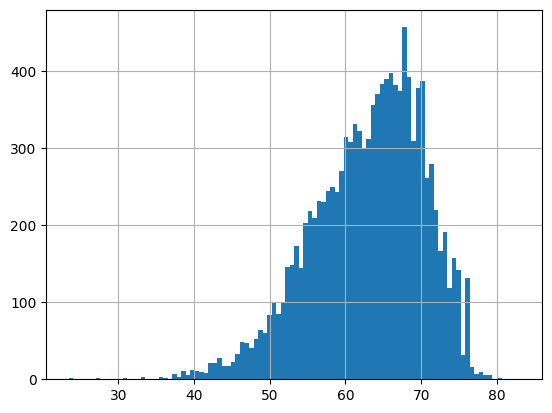

In [ ]:
tabla_regresion['ESTU_INSE_INDIVIDUAL'].hist(bins=100)

<Axes: >

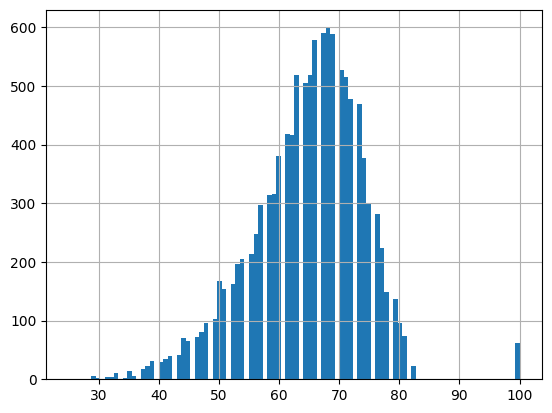

In [ ]:
tabla_regresion['PUNT_LECTURA_CRITICA'].hist(bins=100)

<Axes: >

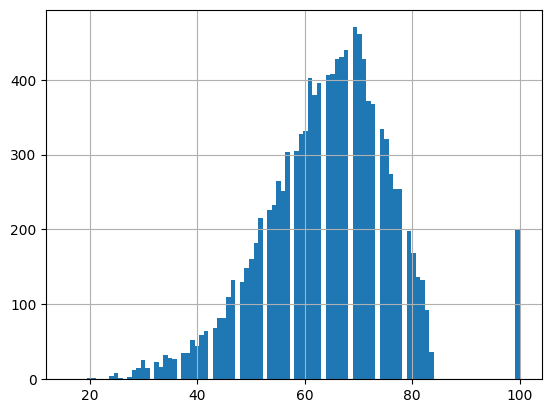

In [ ]:
tabla_regresion['PUNT_MATEMATICAS'].hist(bins=100)

 La forma de la distribución es similar a una campana, lo que sugiere que los puntajes se distribuyen de manera aproximadamente normal. Esto significa que la mayoría de los estudiantes obtuvieron puntajes cercanos al promedio.

<Axes: >

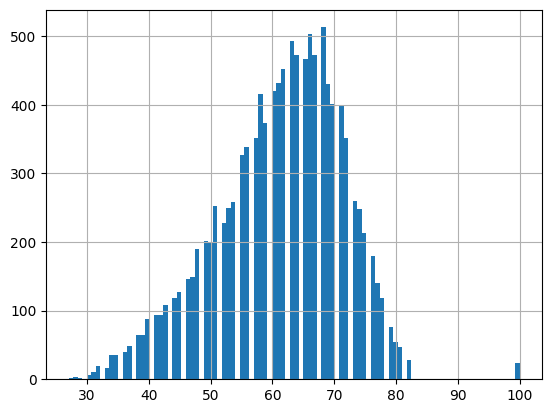

In [ ]:
tabla_regresion['PUNT_C_NATURALES'].hist(bins=100)

la dispersión parece ser moderada, lo que significa que hay una variabilidad considerable en los puntajes, pero no excesiva.

<Axes: >

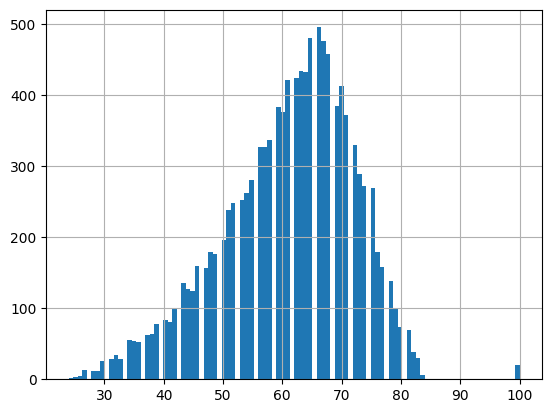

In [ ]:
tabla_regresion['PUNT_SOCIALES_CIUDADANAS'].hist(bins=100)

<Axes: >

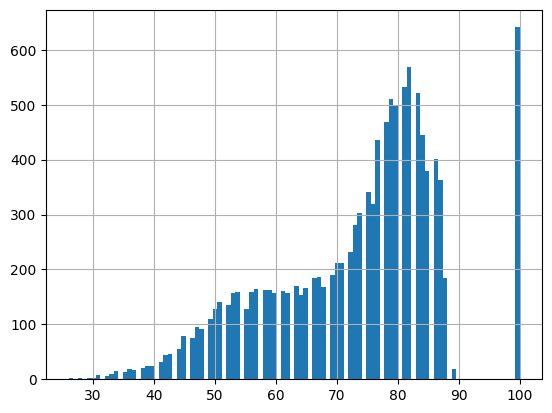

In [ ]:
tabla_regresion['PUNT_INGLES'].hist(bins=100)

Se tiene que después de realizar los respectivos histogramas de cada una de las variables, se observan valores no representativos los cuales se pueden eliminar en la siguiente línea de código.


,ESTU_INSE_INDIVIDUAL,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
3,41.863163,45,41,41,27,58.0
4,51.223795,53,55,41,56,69.0
5,57.690401,63,38,60,59,45.0
6,39.984838,69,60,59,51,50.0
7,50.613232,57,68,74,61,52.0


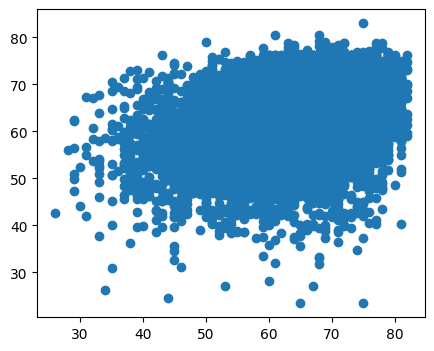

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(tabla_regresion1['PUNT_LECTURA_CRITICA'], tabla_regresion1['ESTU_INSE_INDIVIDUAL'])
plt.show()

Se observa que la mayoría de los puntos se concentran en un área específica del gráfico, principalmente entre los valores de 40 y 80 en ambos ejes.
Esto sugiere que la mayoría de los datos tienen valores en este rango. La forma ovalada de la concentración de puntos indica una posible correlación positiva moderada entre las dos variables (es decir, a medida que una variable aumenta, la otra también lo hace, pero no de forma perfecta).

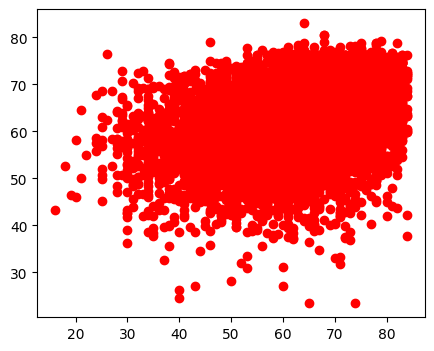

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(tabla_regresion1['PUNT_MATEMATICAS'], tabla_regresion1['ESTU_INSE_INDIVIDUAL'], c= "red")
plt.show()

Se observa una tendencia horizontal con una ligera inclinación ascendente, lo que podría sugerir una correlación débil o moderada entre las variables, aunque parece haber bastante dispersión.

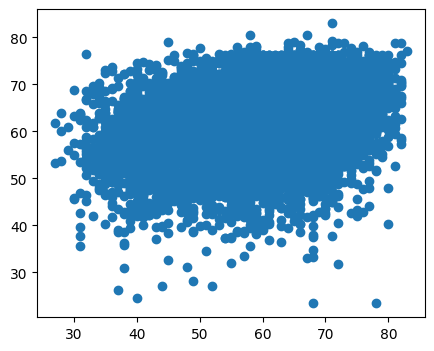

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(tabla_regresion1['PUNT_C_NATURALES'], tabla_regresion1['ESTU_INSE_INDIVIDUAL'])
plt.show()

Esto sugiere que las dos variables tienen una relación con una dispersión moderada, donde gran parte de los datos caen entre los valores de 40 y 80 en el eje X, y entre 50 y 80 en el eje Y. No obstante, sigue habiendo una dispersión considerable.

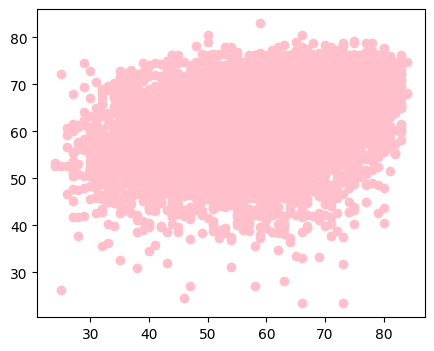

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(tabla_regresion1['PUNT_SOCIALES_CIUDADANAS'], tabla_regresion1['ESTU_INSE_INDIVIDUAL'], c= "pink")
plt.show()

Podemos ver que la mayor densidad está en el centro de la nube, lo que podría sugerir que la mayoría de los datos tienen valores similares para ambas variables.

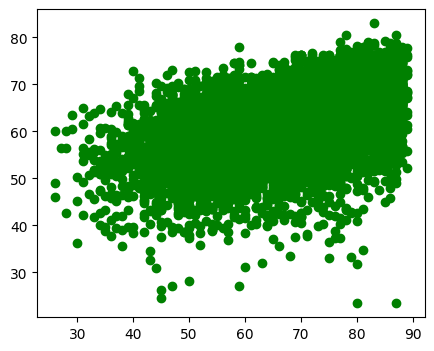

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(tabla_regresion1['PUNT_INGLES'], tabla_regresion1['ESTU_INSE_INDIVIDUAL'], c= "green")
plt.show()

En comparación con la gráfica anterior, esta parece tener una dispersión más evidente hacia la parte superior derecha (valores más altos en X y Y). Esto podría sugerir una leve tendencia ascendente, aunque sigue sin haber una correlación muy clara.

**Coeficiente de Determinación**\
Se va a calcular el coeficiente de determinación para así seleccionar las variables explicativas a través de un modelo de regresión lineal múltiple. El coeficiente de determinacion se utiliza para determinar que tan bueno es el modelo aplicado.

In [ ]:
X=tabla_regresion1.drop("ESTU_INSE_INDIVIDUAL", axis=1)
Y=tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
trainX, testX, trainY, testY = train_test_split (X,Y,test_size=0.2, random_state = 0)
trainX.head(4)

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
8008,61,59,51,52,71.0
8252,42,42,56,45,28.0
3787,66,81,61,62,67.0
6217,59,66,48,38,67.0


Para determinar el coeficiente de determinación se utiliza una función llamada **"score"** y este coeficiente de determinación se calcula para los datos de validación.

In [ ]:
modelo_lineal = LinearRegression()
regresion = modelo_lineal.fit(trainX,trainY)
Pred_lineal = regresion.predict(testX)
r2_lineal = regresion.score(testX, testY)
r2_lineal

0.27967527754225285

In [ ]:
#SIN LECTURA CRITICA
X1 = tabla_regresion1[['PUNT_MATEMATICAS','PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES']]
Y1 = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
trainX1, testX1, trainY1, testY1 = train_test_split (X1,Y1,test_size=0.2, random_state = 0)
modelo_lineal1 = LinearRegression()
regresion1 = modelo_lineal1.fit(trainX1,trainY1)
Pred_lineal1 = regresion1.predict(testX1)
r2_lineal1 = regresion1.score(testX1, testY1)
r2_lineal1

0.27870582912247066

Vemos que el coeficiente de determinacion sin el puntaje lectura crítica es 0.27870582912247066.


In [ ]:
#SIN MATEMATICAS
X2 = tabla_regresion1[['PUNT_LECTURA_CRITICA','PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES']]
Y2 = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
trainX2, testX2, trainY2, testY2 = train_test_split (X2,Y2,test_size=0.2, random_state = 0)
modelo_lineal2 = LinearRegression()
regresion2 = modelo_lineal2.fit(trainX2,trainY2)
Pred_lineal2 = regresion2.predict(testX2)
r2_lineal2 = regresion2.score(testX2, testY2)
r2_lineal2

0.28008110081347015

Se observa que el coeficiente de determinacion sin puntaje matemática es 0.28008110081347015.

In [ ]:
#SIN C_NATURALES
X3 = tabla_regresion1[['PUNT_LECTURA_CRITICA','PUNT_MATEMATICAS', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES']]
Y3 = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
trainX3, testX3, trainY3, testY3 = train_test_split (X3,Y3,test_size=0.2, random_state = 0)
modelo_lineal3 = LinearRegression()
regresion3 = modelo_lineal3.fit(trainX3,trainY3)
Pred_lineal3 = regresion3.predict(testX3)
r2_lineal3 = regresion3.score(testX3, testY3)
r2_lineal3

0.2795748119525783

Vemos que el coeficiente de determinacion sin puntaje ciencias naturales es 0.2795748119525783.

In [ ]:
#SIN C_SOCIALES_CIUDADANAS
X4 = tabla_regresion1[['PUNT_LECTURA_CRITICA','PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_INGLES']]
Y4 = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
trainX4, testX4, trainY4, testY4 = train_test_split (X4,Y4,test_size=0.2, random_state = 0)
modelo_lineal4 = LinearRegression()
regresion4 = modelo_lineal4.fit(trainX4,trainY4)
Pred_lineal4 = regresion4.predict(testX4)
r2_lineal4 = regresion4.score(testX4, testY4)
r2_lineal4

0.2796312154316435

Se dice que el coeficiente de determinacion sin puntaje ciencias sociales es 0.2796312154316435.

In [ ]:
#SIN INGLES
X5 = tabla_regresion1[['PUNT_LECTURA_CRITICA','PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS']]
Y5 = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
trainX5, testX5, trainY5, testY5 = train_test_split (X5,Y5,test_size=0.2, random_state = 0)
modelo_lineal5 = LinearRegression()
regresion5 = modelo_lineal5.fit(trainX5,trainY5)
Pred_lineal5 = regresion5.predict(testX5)
r2_lineal5 = regresion5.score(testX5, testY5)
r2_lineal5

0.13708908232818573

Se tiene que el coeficiente de determinacion con puntaje inglés es 0.27967527754225285 y al hacer el calculo sin tomar esta variable nos da 0.13708908232818573 lo cuál nos indica que la variable "puntaje inglés" es explicativa, porque varía el ajuste del modelo.


Asi mismo, después de hacer un cálculo exhaustivo, encontramos que la otra variable explicativa es el puntaje de lectura crítica

# Red neuronal

In [ ]:
XY, Z = tabla_regresion1[['PUNT_LECTURA_CRITICA', 'PUNT_INGLES']], tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
trainXY, testXY, trainZ, testZ = train_test_split (XY,Z,test_size=0.2, random_state = 0)
trainXY.head(4)

,PUNT_LECTURA_CRITICA,PUNT_INGLES
8008,61,71.0
8252,42,28.0
3787,66,67.0
6217,59,67.0


In [ ]:
modelo1 = LinearRegression()
modelo1.fit(trainXY, trainZ)

LinearRegression()

In [ ]:
modelo1.score(testXY, testZ)

0.27992851068329294

In [ ]:
array= modelo1.coef_
array

array([-0.02460622,  0.33932391])

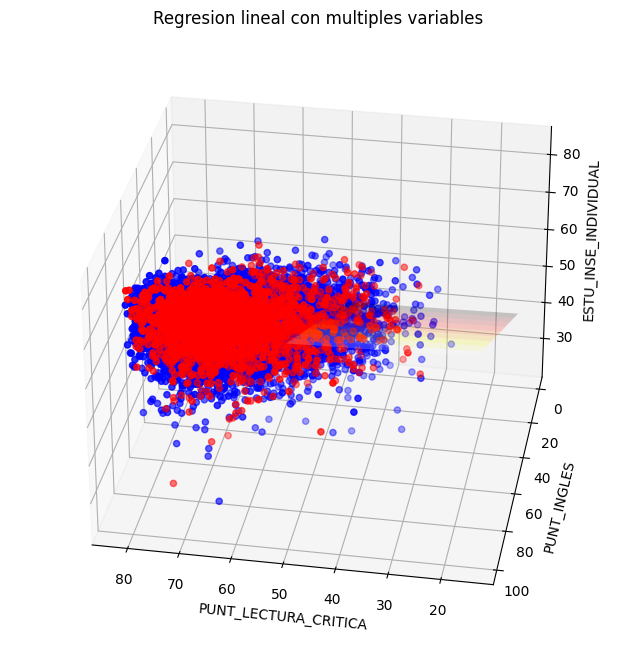

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
xx, yy = np.meshgrid(np.linspace(15, 50 ,num=10), np.linspace(0, 100 ,num=10))
plano_reg = array[0]*xx + array[1]*yy + modelo1.intercept_
ax.plot_surface(xx, yy, plano_reg, alpha=0.2 ,cmap='hot')
ax.scatter(trainXY['PUNT_LECTURA_CRITICA'], trainXY['PUNT_INGLES'], trainZ, color='blue',s=20)
ax.scatter(testXY['PUNT_LECTURA_CRITICA'], testXY['PUNT_INGLES'], testZ, color='red',s=20)
ax.view_init(elev=30.,azim=100)
ax.set_xlabel('PUNT_LECTURA_CRITICA')
ax.set_ylabel('PUNT_INGLES')
ax.set_zlabel('ESTU_INSE_INDIVIDUAL')
ax.set_title('Regresion lineal con multiples variables')
plt.show()

In [ ]:
red = MLPRegressor(hidden_layer_sizes=(100,100,100,100,100,100,100,100),
                       max_iter=500, activation='relu',
                       solver='adam', learning_rate='invscaling')
red.fit(trainX, trainY)

MLPRegressor(hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100, 100),
             learning_rate='invscaling', max_iter=500)

In [ ]:
red.score(testX, testY)

0.2690044279641901

Este modelo de red neuronal nos da un valor de 0.269, lo cual no es un valor cercano a 1, y este bajo desempeño indica que hay margen para mejorar el modelo.

In [ ]:
X.head(4)

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
3,45,41,41,27,58.0
4,53,55,41,56,69.0
5,63,38,60,59,45.0
6,69,60,59,51,50.0


In [ ]:
no_obs = np.array([50,45,43,30,50])
print('Se espera que el nivel socioeconòmico sea:', red.predict([no_obs]), 'bajo el perceptròn multicapa y',
      modelo_lineal.predict([no_obs]), 'bajo la regresión lineal mùltiple')

Se espera que el nivel socioeconòmico sea: [54.85403899] bajo el perceptròn multicapa y [55.58222607] bajo la regresión lineal mùltiple


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Vemos que los valores predichos son diferentes, esto podría deberse a que el perceptrón multicapa modela relaciones más complejas entre los puntajes de las pruebas y el nivel socioeconómico, mientras que la regresión lineal está limitada a suposiciones lineales.

In [ ]:
pearman_corr,_ = spearmanr(tabla_regresion1["PUNT_INGLES"],tabla_regresion1["ESTU_INSE_INDIVIDUAL"])
kendall_corr,_ = kendalltau(tabla_regresion1["PUNT_INGLES"],tabla_regresion1["ESTU_INSE_INDIVIDUAL"])
print(f'Los coeficientes de correlación de Spearman y Kendall son respectivamente {pearman_corr} y {kendall_corr}')

Los coeficientes de correlación de Spearman y Kendall son respectivamente 0.5643625792430149 y 0.3943616513896971


De acuerdo con los coeficientes de correlación de Spearman y Kendall se determina que el puntaje de ingles en el Icfes y el Índice socioeconómico del evaluado en Colombia están moderadamente correlacionados.

In [ ]:
pearman_corr,_ = spearmanr(tabla_regresion1["PUNT_LECTURA_CRITICA"],tabla_regresion1["ESTU_INSE_INDIVIDUAL"])
kendall_corr,_ = kendalltau(tabla_regresion1["PUNT_LECTURA_CRITICA"],tabla_regresion1["ESTU_INSE_INDIVIDUAL"])
print(f'Los coeficientes de correlación de Spearman y Kendall son respectivamente {pearman_corr} y {kendall_corr}')

Los coeficientes de correlación de Spearman y Kendall son respectivamente 0.3374003237263829 y 0.23227379710032733


De acuerdo con los coeficientes de correlación de Spearman y Kendall se determina que el puntaje de lectura crítica en el Icfes y el Índice socioeconómico del evaluado en Colombia están discretamente correlacionados.

Ahora vamos a completar valores faltantes.

In [ ]:
tabla_regresion2 = tabla_regresion[(tabla_regresion['ESTU_INSE_INDIVIDUAL']> 80) & (tabla_regresion['PUNT_LECTURA_CRITICA']<90) & (tabla_regresion['PUNT_MATEMATICAS']<90) & (tabla_regresion['PUNT_C_NATURALES']<90) & (tabla_regresion['PUNT_SOCIALES_CIUDADANAS']<90) & (tabla_regresion['PUNT_INGLES']<90)]
tabla_regresion2.head(10)

,ESTU_INSE_INDIVIDUAL,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
1198,83.007321,75,64,71,59,83.0
8910,80.453570,61,68,67,50,78.0
10650,80.453570,68,68,58,66,87.0


In [ ]:
 X_no = tabla_regresion2.drop("ESTU_INSE_INDIVIDUAL", axis=1 )
red.predict(X_no)

array([65.84003457, 64.32241348, 67.96921772])

In [ ]:
tabla_regresion2["ESTU_INSE_INDIVIDUAL"] = red.predict(X_no)
tabla_regresion2

<ipython-input-45-cfa1f1418c5d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla_regresion2["ESTU_INSE_INDIVIDUAL"] = red.predict(X_no)


,ESTU_INSE_INDIVIDUAL,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
1198,65.840035,75,64,71,59,83.0
8910,64.322413,61,68,67,50,78.0
10650,67.969218,68,68,58,66,87.0


**Conclusiones**

Durante toda la investigación se logró  analizar cada área que se evalua en el icfes respecto al nivel socioeconómico de cada estudiante teniendo como base las gráficas obtenidas de acuerdo a los datos proporcionados, dejando evidenciar que:



* En todas las áreas,  los puntajes se distribuyen de manera aproximadamente normal. Esto significa que la mayoría de los estudiantes obtuvieron puntajes cercanos al promedio, y a medida que nos alejamos del promedio (hacia puntajes muy altos o muy bajos), la cantidad de estudiantes disminuye... Es decir, como hay distribución aproximadamente normal sugiere que el grupo de estudiantes es relativamente homogéneo en términos de sus habilidades en dichas asignaturas...

* También, que el desempeño en dichas área es influenciado por una combinación de factores más allá del simple índice individual del estudiante .Por lo tanto, afecta tanto el nivel socio economico del estudiante, como la poco preparación, ya que son materias importantes que establecen los conocimientos adquiridos no solo en ese año escolar si no en toda la vida academica estudiantil, entonces puede llevar más estudio para la mayoria de estudiantes a diferencia de otras asignaturas.



*  Tomando en cuenta todas las variables estudiadas durante toda la investigación, y lo mencionado anteriormente, se concluye que el análisis de los resultados del ICFES en relación con los niveles socioeconómicos de los estudiantes revela que existe una asociación moderada entre el desempeño académico y el nivel socioeconómico, especialmente en áreas como el inglés y las matemáticas.

Los estudiantes con un nivel socioeconómico más alto tienden a obtener mejores puntajes, lo cual refleja desigualdades en el acceso a recursos educativos y oportunidades. Es decir, que tienen mayor preparación para las pruebas ICFES los estudiantes de familias que tienen un mayor nivel socioeconomico ya que tiene accesso a materiales didacticos como lo son (libros, tutorias, internet, las TIC, entre otros). Lo cual, como consecuencia, se permite tener un mejor rendimiento en las pruebas, dejando atrás a los estudiantes que provienen de familias de bajos niveles socioeconomicos.

Para mejorar estos resultados y reducir la brecha socioeconómica, es fundamental que el gobierno implemente políticas públicas orientadas a fortalecer la equidad en la educación. Esto podría incluir inversiones en programas de refuerzo escolar para estudiantes de bajos recursos, capacitación docente en zonas desfavorecidas y el acceso universal a tecnologías educativas. Además, fomentar el aprendizaje de todas las áreas que se evaluan en el icfes desde temprana edad, en todas las instituciones educativas, podría ayudar a mejorar los puntajes en esta área, creando asi mejores puntajes y a su vez mejores oportunidades laborales y de vida.


